<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Random Numbers (Good)</span></div>

## 1 Random numbers from other distributions

### 1.1 Random numbers from the Normal distribution

In [4]:
import numpy as np

np.random.normal(loc=5, scale=2, size=10)


array([6.84065655, 7.65249422, 4.74443388, 5.54697882, 4.29625269,
       1.39473774, 5.60862706, 5.03581301, 1.69187809, 6.74825123])

### 1.2 Visualising the random numbers

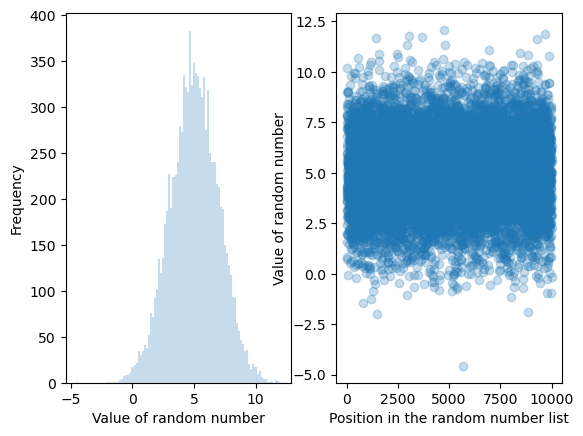

In [5]:
import matplotlib.pyplot as plt

n = 1_000_0
random_numbers = np.random.normal(loc=5, scale=2, size=n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

plt.show()


### 1.3 68%?

In [5]:
n = 10_000
mean, sd = 5, 2
random_numbers = np.random.normal(loc=mean, scale=sd, size=n)

mask = (random_numbers >= mean - sd) & (random_numbers <= mean + sd)

print(f'% of points between 1 std.dev. from the mean: {np.sum(mask)/n*100:.2f}%')


% of points between 1 std.dev. from the mean: 67.54%


## 1 Brownian Motion in 1D

### 1.1 The scenario

In [13]:
prob_right = p
prob_left = 1-p

### 1.2 The simulation

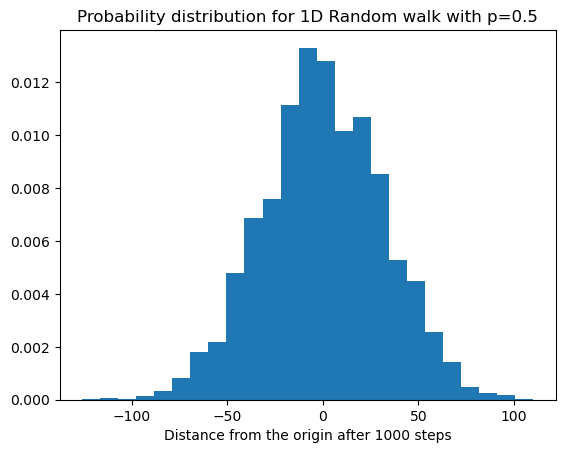

In [14]:
import numpy.random as rnd

def brown_1d(prob_right=.5, no_of_steps=10000):
    ''' 
        This function returns the final position of the particle 
        after the number of steps.
        prob_right is the probability of going right.
    '''

    step_size = 1    
    x = 0                               # starting x position

    for _ in range(no_of_steps):
        if rnd.random() < prob_right:   # Go right?
            x += step_size
        else:
            x -= step_size

    return x


no_of_steps, p = 1_000, .5
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True)
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')

plt.show()

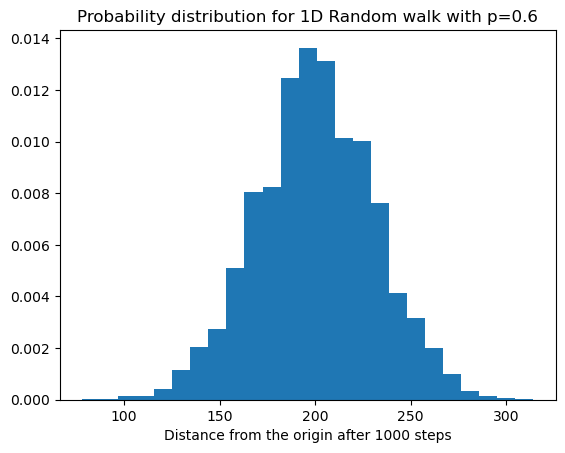

In [7]:
import numpy.random as rnd

def brown_1d(prob_right=.6, no_of_steps=10000):
    ''' 
        This function returns the final position of the particle 
        after the number of steps.
        prob_right is the probability of going right.
    '''

    step_size = 1    
    x = 0                               # starting x position

    for _ in range(no_of_steps):
        if rnd.random() < prob_right:   # Go right?
            x += step_size
        else:
            x -= step_size

    return x


no_of_steps, p = 1_000, .6
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True)
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')

plt.show()

### 1.3 What does theory say?

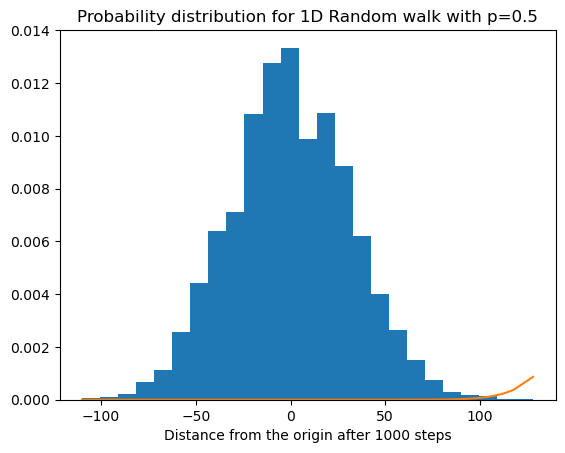

In [21]:
import numpy.random as rnd


def brown_1d(prob_right=.5, no_of_steps=10000):
    ''' 
        This function returns the final position of the particle 
        after the number of steps.
        prob_right is the probability of going right.
    '''

    step_size = 1    
    x = 0                               # starting x position

    for _ in range(no_of_steps):
        if rnd.random() < prob_right:   # Go right?
            x += step_size
        else:
            x -= step_size

    return x


no_of_steps, p = 1_000, .5
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True)
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')

def normal(x, m=0, s=1):
    '''
    Probability density function for the
    Gaussian distribution.
    '''
    s2 = s**2
    output = np.exp(-(x-m)**2/(2*s2))
    output /= np.sqrt(2*np.pi*s2)
    return output

prob_left = 1 - prob_right                       # q = 1 -p
mean = no_of_steps * (prob_right - prob_left)    # mean = N(p - q)
sd = np.sqrt(4*no_of_steps*prob_right*prob_left) # sd = sqrt(4 N p q)
x = np.unique(results)                           # Numbers that form 
                                                 # the x-axis
plt.plot(x, normal(x, mean, sd), label='Theoretical')
plt.show()

## 2 Estimating \(\pi\)

### 2.1 The method

### 2.2 A poor but intuitive solution

In [23]:
N_total = 100_000                             # Yes, Python allows the _
N_green = 0

for _ in range(N_total):
    x = rnd.uniform(low=-1, high=1, size=1)     
    y = rnd.uniform(low=-1, high=1, size=1)
    r = np.sqrt(x**2 + y**2)                   # Distance from the origin

    if r <= 1:
        N_green += 1                           # In or out of the circle

4 * N_green / N_total                          # Estimate for pi



3.13436

### 2.3 A better solution

In [24]:
N_total=1_000_000
x=rnd.uniform(low=-1, high=1, size=N_total)
y=rnd.uniform(low=-1, high=1, size=N_total)
N_green= np.sum((x**2+y**2) <= 1)                # Oh! the ease of NumPy!

4 * (N_green / N_total)


3.143376

### 2.4 A smarter solution

In [25]:
N_total=1_000_000
x=rnd.rand(N_total)
y=rnd.rand(N_total)
N_green=np.sum((x**2+y**2) <= 1)

4 * (N_green / N_total)


3.141312

## Exercise 1 :  Vital Stats of Random π

In [8]:
# Question 1 & 2

def estimate_pi(n):
    x = rnd.rand(n)
    y = rnd.rand(n)
    N_green=np.sum((x**2+y**2) <= 1)
    
    return 4 * (N_green / n)

n= 10000
num_trials = 100

estimates = [estimate_pi(n) for i in range(num_trials)]    
mean = np.mean(estimates)
std_dev = np.std(estimates)

print(f"Mean estimate of pi over {num_trials} trials: {mean}")
print(f"Standard deviation of estimates: {std_dev}")

Mean estimate of pi over 100 trials: 3.142904
Standard deviation of estimates: 0.017167282370835524


In [9]:
# Question 3

n_values = [10, 100, 1000, 10000, 100000, 1000000]
num_trials = 100

estimates_n = []
for n in n_values:
    if n == 10:
        estimates_for_10 = [estimate_pi(n) for i in range(num_trials)] 
    elif n == 100:
        estimates_for_100 = [estimate_pi(n) for i in range(num_trials)]
    elif n == 1000:
        estimates_for_1000 = [estimate_pi(n) for i in range(num_trials)] 
    elif n == 10000:
        estimates_for_10000 = [estimate_pi(n) for i in range(num_trials)]
    elif n == 100000:
        estimates_for_100000 = [estimate_pi(n) for i in range(num_trials)]
    else:
        estimates_for_1000000 = [estimate_pi(n) for i in range(num_trials)] 

mean = [np.mean(estimates_for_10), np.mean(estimates_for_100), np.mean(estimates_for_1000), np.mean(estimates_for_10000), np.mean(estimates_for_100000), np.mean(estimates_for_1000000)] 
print(mean)

std = [np.std(estimates_for_10), np.std(estimates_for_100), np.std(estimates_for_1000), np.std(estimates_for_10000), np.std(estimates_for_100000), np.std(estimates_for_1000000)]
print(std)

[3.1240000000000006, 3.1336, 3.14568, 3.1425120000000004, 3.1411607999999998, 3.1417002799999993]
[0.5387244193462926, 0.1795300531944443, 0.04670650490028133, 0.01636660795644596, 0.005239108259999975, 0.0016092658952453925]


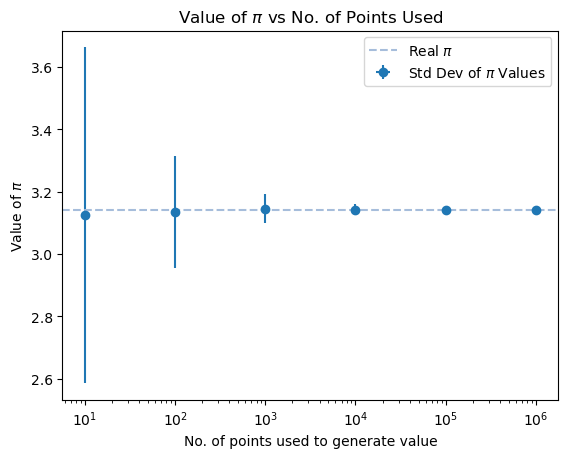

In [16]:
# plotting

from matplotlib import pyplot as plt


x = n_values
y1 = mean 
y1_err = std

plt.errorbar(x, y1, xerr = 0, yerr=y1_err, fmt='o', 
             label='Std Dev of $\pi$ Values')
plt.axhline(np.pi, linestyle='dashed', label='Real $\pi$', color='#a6bddb')
plt.xscale('log')
plt.xlabel('No. of points used to generate value')
plt.ylabel('Value of $\pi$')
plt.title('Value of $\pi$ vs No. of Points Used')
plt.legend(loc='upper right')
plt.show(block=False)